In [1]:
import h5py
import dill
import numpy as np

In [2]:
# with open('/Genomics/ayroleslab2/scott/git/lts-manuscript/analysis/lts-mm/Projections/dataset_1_pcaModes_zVals_outputStatistics.pkl', 'rb') as pickle_file:
#     content = dill.load(pickle_file)

In [3]:
# f = h5py.File("/Genomics/ayroleslab2/scott/git/lts-manuscript/analysis/lts-mm/Projections/dataset_1_pcaModes_zVals.mat")
#  f['zValues'][:]

In [4]:
f = h5py.File("/Genomics/ayroleslab2/scott/git/lts-manuscript/analysis/lts-mm-gpu/TSNE/zVals_wShed_groups.mat")

In [5]:
f.keys()

<KeysViewHDF5 ['#refs#', 'LL', 'density', 'groups', 'sigma', 'v', 'watershedRegions', 'wbounds', 'xx', 'zValLens', 'zValNames', 'zValues']>

In [6]:
f['watershedRegions']

<HDF5 dataset "watershedRegions": shape (8656804, 1), type "<i4">

In [7]:
test = f['zValNames']
lst = [test[i][0] for i in range(len(f['zValNames']))]
names = [f[i] for i in lst]
names = [''.join(chr(i) for i in obj[:]) for obj in names]

ends = np.cumsum(f['zValLens'][:])

In [8]:
import numpy as np 
np.unique(f['watershedRegions'][:])


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [9]:
d = {names[i]:[(0 if (i-1 < 0) else ends[i-1]),ends[i]] for i in range(len(ends))}

In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
from matplotlib.patches import Circle
from matplotlib import patches

mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 15
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"]
mpl.rcParams["axes.titlesize"] = "xx-large"  # medium, large, x-large, xx-large

mpl.style.use("seaborn-deep")

In [11]:
from itertools import groupby
def encode_list(s_list):
    return [[len(list(group)), key[0]] for key, group in groupby(s_list)]

In [12]:
import sys
sys.path.append('../')
import analysis.utils.trx_utils as trx_utils

In [22]:
filename = "/Genomics/ayroleslab2/scott/long-timescale-behavior/data/organized_tracks/20220217-lts-cam1/cam1_20220217_0through190_cam1_20220217_0through190_0-tracked.analysis.h5"
import h5py
import numpy as np

with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print(filename)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

filtered_locations = trx_utils.fill_missing_np(locations)
filtered_locations = trx_utils.smooth_median(filtered_locations)
filtered_locations = trx_utils.smooth_gaussian(filtered_locations)

===filename===
/Genomics/ayroleslab2/scott/long-timescale-behavior/data/organized_tracks/20220217-lts-cam1/cam1_20220217_0through190_cam1_20220217_0through190_5-tracked.analysis.h5

===HDF5 datasets===
['instance_scores', 'node_names', 'point_scores', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks']

===locations data shape===
(1803500, 14, 2, 4)

===nodes===
0: head
1: eyeL
2: eyeR
3: thorax
4: abdomen
5: forelegL
6: forelegR
7: midlegL
8: midlegR
9: hindlegL
10: hindlegR
11: wingL
12: wingR
13: proboscis



100%|██████████| 112/112 [00:16<00:00,  6.68it/s]


In [20]:
import importlib
importlib.reload(trx_utils)

<module 'analysis.utils.trx_utils' from '../analysis/utils/trx_utils.py'>

(13, 14, 2, 4)
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
Frame 10
Frame 11
Frame 12
(13, 14, 2, 4)
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
Frame 10
Frame 11
Frame 12
(10, 14, 2, 4)
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
(10, 14, 2, 4)
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
(10, 14, 2, 4)
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
(10, 14, 2, 4)
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
(11, 14, 2, 4)
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
Frame 10
(13, 14, 2, 4)
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
Frame 10
Frame 11
Frame 12
(11, 14, 2, 4)
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
Frame 10
(10, 14, 2, 4)
Frame 0
Frame 1
Frame 2


KeyboardInterrupt: 

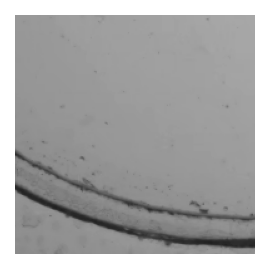

In [23]:
videofile = "/Genomics/ayroleslab2/scott/long-timescale-behavior/data/organized_videos/20220217-lts-cam1/20220217-lts-cam1-0000.mp4"
# region = 3
min_length = 10

for fly_id in range(4):
    f = h5py.File("/Genomics/ayroleslab2/scott/git/lts-manuscript/analysis/lts-mm-gpu/TSNE/zVals_wShed_groups.mat")
    rle_list = encode_list(f['watershedRegions'][d[f'cam1_20220217_0through190_cam1_20220217_0through190_1-tracked-{3-fly_id}-pcaModes'][0]:d[f'cam1_20220217_0through190_cam1_20220217_0through190_1-tracked-{3-fly_id}-pcaModes'][1]])
    dict_rle = {'number':[p[1] for p in rle_list], 'length':  [p[0] for p in rle_list]}
    df = pd.DataFrame(dict_rle)
    # Get the end
    df['end'] = np.cumsum(df.length)
    # Get the start
    df['start'] = df.end - df.length
    _,angles = trx_utils.normalize_to_egocentric(filtered_locations[:,:,:,fly_id],ctr_ind=node_names.index('thorax'),fwd_ind=node_names.index('head'),return_angles=True)
    for region in range(1,21):
        count = 0
        subset = df[(df.number == region) & (df.length >= min_length) ]
        for i in range(subset.shape[0]):
            if count < 3:
                subset_top = subset.iloc[i,:]
                trx_utils.plot_ego(output_path=f'brady/tsne-fly{fly_id}-region{region}-frames{subset_top.start}to{subset_top.end}.mp4' ,tracks=filtered_locations,fly_ids=[fly_id],video_path=videofile, angles=angles,frame_start=subset_top.start,frame_end=subset_top.end,trail_length=10)
                count += 1
            else:
                count = 0
                break

In [16]:
rle_list

[[30, 0],
 [1, 6],
 [2, 0],
 [2, 6],
 [3, 0],
 [1, 2],
 [1, 0],
 [1, 6],
 [16, 0],
 [1, 5],
 [5, 0],
 [1, 6],
 [1, 0],
 [1, 6],
 [30, 0],
 [5, 2],
 [13, 0],
 [1, 5],
 [12, 0],
 [1, 5],
 [16, 0],
 [1, 6],
 [21, 0],
 [4, 5],
 [3, 0],
 [1, 5],
 [8, 0],
 [1, 9],
 [7, 0],
 [1, 9],
 [2, 0],
 [1, 9],
 [34, 0],
 [1, 5],
 [1, 0],
 [1, 5],
 [33, 0],
 [1, 5],
 [8, 0],
 [1, 9],
 [1, 0],
 [1, 9],
 [9, 0],
 [1, 9],
 [13, 0],
 [1, 9],
 [14, 0],
 [1, 9],
 [23, 0],
 [1, 9],
 [1, 0],
 [1, 9],
 [3, 0],
 [2, 9],
 [3, 0],
 [1, 9],
 [3, 0],
 [1, 9],
 [3, 0],
 [1, 9],
 [6, 0],
 [2, 5],
 [5, 0],
 [1, 5],
 [14, 0],
 [3, 5],
 [2, 0],
 [2, 5],
 [5, 0],
 [1, 5],
 [5, 0],
 [1, 9],
 [1, 0],
 [1, 9],
 [3, 0],
 [2, 5],
 [4, 0],
 [2, 9],
 [20, 0],
 [1, 9],
 [1, 0],
 [2, 9],
 [1, 0],
 [1, 9],
 [3, 0],
 [1, 9],
 [1, 0],
 [2, 9],
 [1, 0],
 [1, 9],
 [4, 0],
 [3, 9],
 [13, 0],
 [1, 9],
 [4, 0],
 [1, 9],
 [4, 0],
 [2, 9],
 [3, 0],
 [1, 9],
 [11, 0],
 [1, 9],
 [14, 0],
 [1, 9],
 [6, 0],
 [1, 9],
 [1, 0],
 [1, 9],
 [11, 0],
 

In [17]:
d

{'cam1_20220217_0through190_cam1_20220217_0through190_5-tracked-1-pcaModes': [0,
  360700],
 'cam1_20220217_0through190_cam1_20220217_0through190_4-tracked-1-pcaModes': [360700,
  721400],
 'cam1_20220217_0through190_cam1_20220217_0through190_2-tracked-2-pcaModes': [721400,
  1082100],
 'cam1_20220217_0through190_cam1_20220217_0through190_5-tracked-0-pcaModes': [1082100,
  1442800],
 'cam1_20220217_0through190_cam1_20220217_0through190_2-tracked-3-pcaModes': [1442800,
  1803500],
 'cam1_20220217_0through190_cam1_20220217_0through190_4-tracked-3-pcaModes': [1803500,
  2164200],
 'cam1_20220217_0through190_cam1_20220217_0through190_4-tracked-2-pcaModes': [2164200,
  2524900],
 'cam1_20220217_0through190_cam1_20220217_0through190_1-tracked-1-pcaModes': [2524900,
  2885600],
 'cam1_20220217_0through190_cam1_20220217_0through190_5-tracked-3-pcaModes': [2885600,
  3246300],
 'cam1_20220217_0through190_cam1_20220217_0through190_1-tracked-3-pcaModes': [3246300,
  3607000],
 'cam1_20220217_0thr